

---



In [23]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
def won_medal(row):
    if row['gold'] == 1:
        return 1
    if row['silver'] == 1:
        return 1
    if row['bronze'] == 1:
        return 1
    return 0

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

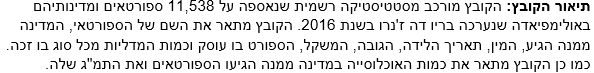

https://www.kaggle.com/datasets/rio2016/olympic-games?select=countries.csv

**מניפולציות שנעשו על הדאטה**

In [26]:
athlete_data = pd.read_csv("./athletes.csv")
countries = pd.read_csv("./countries.csv")
#renaming the "code" column in "countries" table in order to join the tables later
countries.rename(columns={'code':'nationality'}, inplace=True)
#joining the table on "nationality" column
athlete_data = pd.merge(athlete_data, countries,on='nationality')
#changing "sex" column to binary data
athlete_data['sex'] = athlete_data.sex.map(dict(female=1, male=0))
#creating a column indicating wether the athlete won any medal 
athlete_data['won_any_medal'] = athlete_data.apply(lambda row: won_medal(row), axis=1)
#converting the "dob" column to datetime 
athlete_data['dob'] = pd.to_datetime(athlete_data.dob)
athlete_data['dob'] = athlete_data['dob'].mask(athlete_data['dob'].dt.year > 2016,
                                               athlete_data['dob'] - pd.DateOffset(years=100))

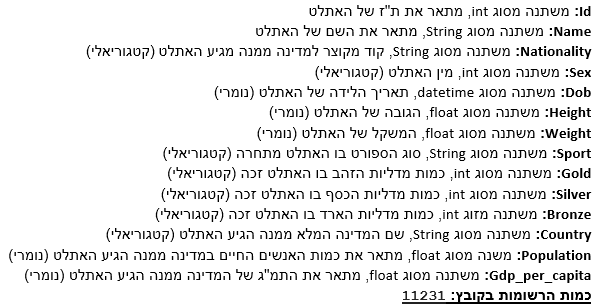

In [27]:
athlete_data.dtypes

id                         int64
name                      object
nationality               object
sex                        int64
dob               datetime64[ns]
height                   float64
weight                   float64
sport                     object
gold                       int64
silver                     int64
bronze                     int64
country                   object
population               float64
gdp_per_capita           float64
won_any_medal              int64
dtype: object

In [28]:
len(athlete_data.id)

11231

Statistical Values - Height:
count    10910.000000
mean         1.765469
std          0.112337
min          1.210000
25%          1.690000
50%          1.760000
75%          1.840000
max          2.210000
Name: height, dtype: float64


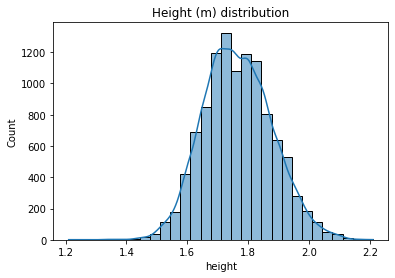

Statistical Value - Weight:
count    10585.000000
mean        71.974398
std         16.110382
min         31.000000
25%         60.000000
50%         70.000000
75%         80.000000
max        170.000000
Name: weight, dtype: float64


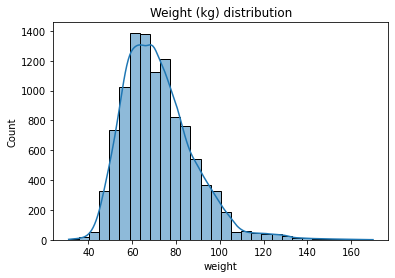

Statistical Values - Date of Birth:
count                            11230
mean     1989-10-19 16:24:08.975957376
min                1954-05-20 00:00:00
25%                1986-11-18 06:00:00
50%                1990-06-01 12:00:00
75%                1993-07-24 00:00:00
max                2002-11-26 00:00:00
Name: dob, dtype: object


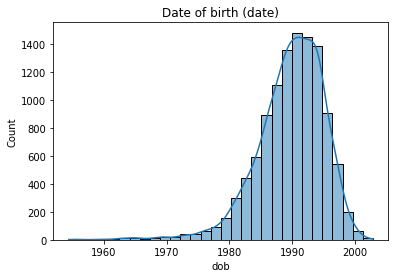

Statistical Values - Population:
count    1.114800e+04
mean     1.263067e+08
std      2.851921e+08
min      1.022200e+04
25%      1.055122e+07
50%      4.341676e+07
75%      8.141314e+07
max      1.371220e+09
Name: population, dtype: float64


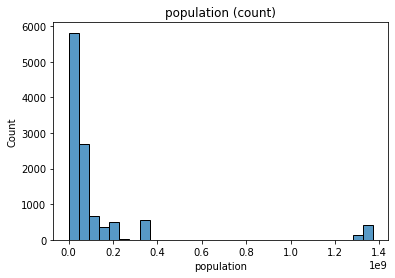

Statistical Values - GDP:
count     10722.000000
mean      25214.307173
std       20074.211574
min         277.068309
25%        8027.683810
50%       19222.150076
75%       42311.036231
max      101449.968168
Name: gdp_per_capita, dtype: float64


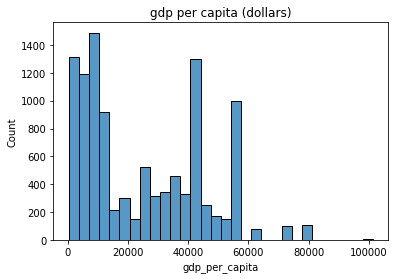

In [29]:
#numeric
print("Statistical Values - Height:")
print(athlete_data['height'].describe())
plot = sns.histplot(athlete_data['height'], kde=True, bins=30)
plt.title("Height (m) distribution")
plt.show()
plt.close()
print("Statistical Value - Weight:")
print(athlete_data['weight'].describe())
sns.histplot(athlete_data['weight'], kde=True, bins=30)
plt.title("Weight (kg) distribution")
plt.show()
print("Statistical Values - Date of Birth:")
print(athlete_data['dob'].describe(datetime_is_numeric=True))
sns.histplot(athlete_data['dob'], kde=True, bins=30)
plt.title("Date of birth (date)")
plt.show()
print("Statistical Values - Population:")
print(athlete_data['population'].describe())
sns.histplot(athlete_data['population'], bins=30)
plt.title("population (count)")
plt.show()
print("Statistical Values - GDP:")
print(athlete_data['gdp_per_capita'].describe())
sns.histplot(athlete_data['gdp_per_capita'], bins=30)
plt.title("gdp per capita (dollars)")
plt.show()

,nationality,counts
0,AFG,3
1,ALB,6
2,ALG,68
3,AND,5
4,ANG,26
...,...,...
191,VIE,23
192,VIN,4
193,YEM,3
194,ZAM,7


,country,counts
0,Afghanistan,3
1,Albania,6
2,Algeria,68
3,American Samoa*,4
4,Andorra,5
...,...,...
191,Vietnam,23
192,Virgin Islands*,7
193,Yemen,3
194,Zambia,7


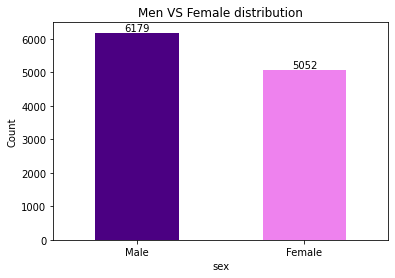

,sport,counts
0,aquatics,1397
1,archery,128
2,athletics,2287
3,badminton,172
4,basketball,264
5,boxing,284
6,canoe,321
7,cycling,520
8,equestrian,222
9,fencing,239


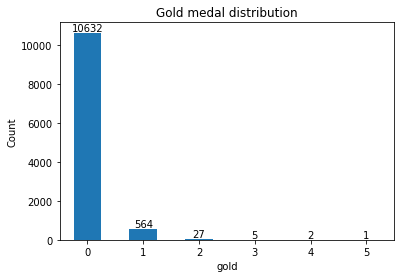

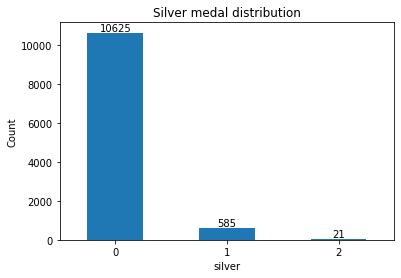

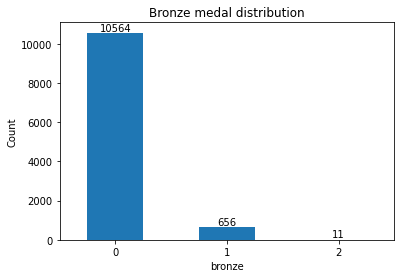

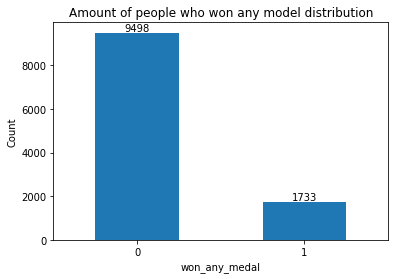

,won_any_medal,counts
0,0,9498
1,1,1733


In [30]:
#categorial
nation_df = athlete_data[['nationality','id']]
nation_df = nation_df.groupby(['nationality'])['nationality'].size().reset_index(name='counts')
display(nation_df)
country_df = athlete_data[['country','id']]
country_df = country_df.groupby(['country'])['country'].size().reset_index(name='counts')
display(country_df)
sex_df = athlete_data[['sex','id']]
sex_df = sex_df.groupby(['sex'])['sex'].size().reset_index(name='counts')
sex_df.sex[sex_df['sex'] == 0] = 'Male'
sex_df.sex[sex_df['sex'] == 1] = 'Female'
ax2 = sex_df.plot.bar(x='sex', y='counts', rot=0, width=0.5, color=['indigo', 'violet'])
ax2.set_title('Men VS Female distribution')
ax2.legend().set_visible(False)
ax2.bar_label(ax2.containers[0], label_type='edge')
plt.ylabel('Count')
plt.show()
sport_df = athlete_data[['sport','id']]
sport_df = sport_df.groupby(['sport'])['sport'].size().reset_index(name='counts')
display(sport_df)

def medal_type_bar_plot(type, title):
    df = athlete_data[[type,'id']]
    df = df.groupby([type])[type].size().reset_index(name='counts')
    ax = df.plot.bar(x=type , y='counts', rot=0, width=0.5)
    ax.set_title(title)
    ax.legend().set_visible(False)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.ylabel('Count')
    plt.show()
    return df

df1 = medal_type_bar_plot('gold', "Gold medal distribution")
df2 = medal_type_bar_plot('silver', "Silver medal distribution")
df3 = medal_type_bar_plot('bronze', "Bronze medal distribution")
medal_type_bar_plot('won_any_medal', "Amount of people who won any model distribution")

image.png

In [31]:
print("Null values in each column:")
print(athlete_data.isna().sum())

Null values in each column:
id                  0
name                0
nationality         0
sex                 0
dob                 1
height            321
weight            646
sport               0
gold                0
silver              0
bronze              0
country             0
population         83
gdp_per_capita    509
won_any_medal       0
dtype: int64


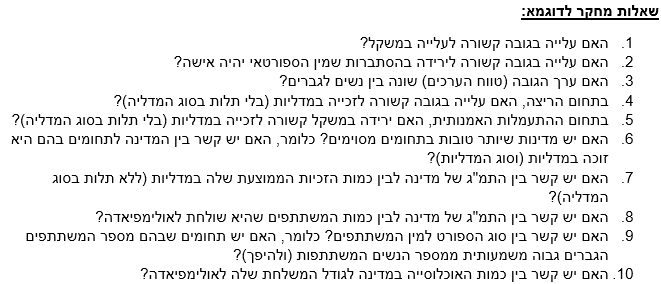